In [1]:
import numpy as np
import pandas as ps
import keras

Using TensorFlow backend.


In [2]:
df = ps.read_csv("Kaggle dataset/fer2013.csv")
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [3]:
train = df[df['Usage'] == "Training"]
test  = df[(df['Usage'] == 'PublicTest') | (df['Usage'] == 'PrivateTest')]

In [4]:
x_train = train['pixels'].as_matrix()
y_train = train['emotion'].as_matrix()

x_test = test['pixels'].as_matrix()
y_test = test['emotion'].as_matrix()

y_train = np.reshape(y_train, (len(y_train),1))
y_test = np.reshape(y_test, (len(y_test),1))

C:\Users\Cordu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Cordu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Cordu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Cordu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [5]:
def process_input(x):
    output = np.empty(shape=(len(x), 48, 48))
    for i in range(len(x)):
        image = np.fromstring(x[i], dtype=int, sep=' ').reshape((48, 48)) / 255
        output[i] = image
    return output

x_train = process_input(x_train)
x_test = process_input(x_test)

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[25])


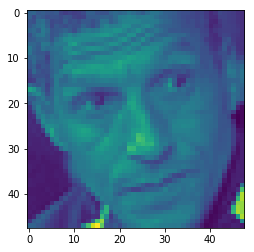

In [7]:
plt.imshow(x_test[25])

In [8]:
from keras.utils.np_utils import to_categorical # from keras import utils as np_utils

print(y_train.shape)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(28709, 1)


In [9]:
x_train = np.reshape(x_train, (len(x_train), 48, 48, 1))
x_test = np.reshape(x_test, (len(x_test), 48, 48, 1))

In [23]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras.layers import Dense
from keras import layers
from keras.regularizers import l2
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 padding="same",
                 activation='relu',
                 input_shape=(48,48,1)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.5))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.5))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
#model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.5))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
#model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 128)       0         
__________

In [24]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator()

model.fit_generator(data_generator.flow(x_train, y_train,
                                            128),
        epochs = 100,steps_per_epoch= int(len(x_train) / 128), 
        validation_data = (x_test,y_test),
        validation_steps = int(len(x_test) / 128) )

Epoch 1/100
224/224 [==============================] - 22s 99ms/step - loss: 1.8665 - acc: 0.2504 - val_loss: 1.8168 - val_acc: 0.2471
Epoch 2/100
224/224 [==============================] - 19s 86ms/step - loss: 1.8118 - acc: 0.2516 - val_loss: 1.8136 - val_acc: 0.2471
Epoch 3/100
224/224 [==============================] - 19s 86ms/step - loss: 1.8093 - acc: 0.2525 - val_loss: 1.8093 - val_acc: 0.2471
Epoch 4/100
224/224 [==============================] - 19s 86ms/step - loss: 1.7822 - acc: 0.2596 - val_loss: 1.7562 - val_acc: 0.2859
Epoch 5/100
224/224 [==============================] - 19s 86ms/step - loss: 1.7079 - acc: 0.3021 - val_loss: 1.6372 - val_acc: 0.3473
Epoch 6/100
224/224 [==============================] - 19s 86ms/step - loss: 1.6156 - acc: 0.3620 - val_loss: 1.5045 - val_acc: 0.4090
Epoch 7/100
224/224 [==============================] - 19s 86ms/step - loss: 1.5289 - acc: 0.4015 - val_loss: 1.4306 - val_acc: 0.4408
Epoch 8/100
224/224 [==============================] - 

224/224 [==============================] - 32s 143ms/step - loss: 0.6671 - acc: 0.7511 - val_loss: 1.1638 - val_acc: 0.6163
Epoch 62/100
224/224 [==============================] - 33s 147ms/step - loss: 0.6525 - acc: 0.7567 - val_loss: 1.1787 - val_acc: 0.6218
Epoch 63/100
224/224 [==============================] - 33s 146ms/step - loss: 0.6523 - acc: 0.7576 - val_loss: 1.2176 - val_acc: 0.6173
Epoch 64/100
224/224 [==============================] - 33s 146ms/step - loss: 0.6332 - acc: 0.7656 - val_loss: 1.2314 - val_acc: 0.6201
Epoch 65/100
224/224 [==============================] - 33s 146ms/step - loss: 0.6332 - acc: 0.7633 - val_loss: 1.2315 - val_acc: 0.6219
Epoch 66/100
224/224 [==============================] - 33s 146ms/step - loss: 0.6232 - acc: 0.7676 - val_loss: 1.2320 - val_acc: 0.6216
Epoch 67/100
224/224 [==============================] - 32s 142ms/step - loss: 0.6079 - acc: 0.7743 - val_loss: 1.2126 - val_acc: 0.6265
Epoch 68/100
224/224 [==============================] 

[[5.4429980e-05 4.8957316e-10 1.6653183e-05 9.9939883e-01 4.2540823e-06
  3.7290615e-06 5.2209297e-04]]


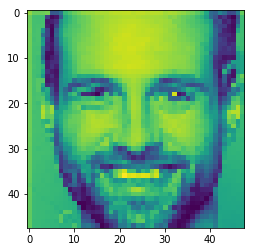

In [26]:
import numpy as np
import cv2 
from keras.preprocessing.image import img_to_array

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread('happy.jpg', 0)
faces = face_cascade.detectMultiScale(img, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    crop_face = img[y:y+h, x:x+w]
    gray_crop_face = cv2.resize(crop_face,(48,48))
    plt.imshow(gray_crop_face)
    gray_crop_face = gray_crop_face.astype("float") / 255.0
    gray_crop_face = img_to_array(gray_crop_face)
    gray_crop_face = np.expand_dims(gray_crop_face, axis=0)
    print(model.predict(gray_crop_face))